In [6]:
# Import necessary libraries
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt # Good to import for plotting

In [7]:
# 1. Load the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a Pandas DataFrame for easier manipulation
X = pd.DataFrame(data, columns=feature_names)
y = pd.Series(target)

# You can inspect the data
print("First 5 rows of features (X):")
print(X.head())

First 5 rows of features (X):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
# 2. Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Import the Input layer
from tensorflow.keras.layers import Input

# 3. Build and Compile the Neural Network Model
model = Sequential()

# Add the explicit Input layer
# The shape is a tuple, so we use (X_train_scaled.shape[1],)
# The comma is important for defining a tuple with one element.
model.add(Input(shape=(X_train_scaled.shape[1],))) 

# Add the first hidden layer (no input_dim needed anymore)
model.add(Dense(128, activation='relu'))

# Add the second hidden layer
model.add(Dense(64, activation='relu'))

# Add the output layer
model.add(Dense(1))

# 4. Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 5. Train the Model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 619.1493 - val_loss: 427.4161
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 414.6221 - val_loss: 148.3677
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 108.3869 - val_loss: 39.3251
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.3960 - val_loss: 29.0146
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.8016 - val_loss: 27.7543
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.6669 - val_loss: 25.9057
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4560 - val_loss: 24.0911
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.6017 - val_loss: 22.6323
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6901 - val_loss: 22.2828
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8867 - val_loss: 20.6933
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5863 - val_loss: 20.3059
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━

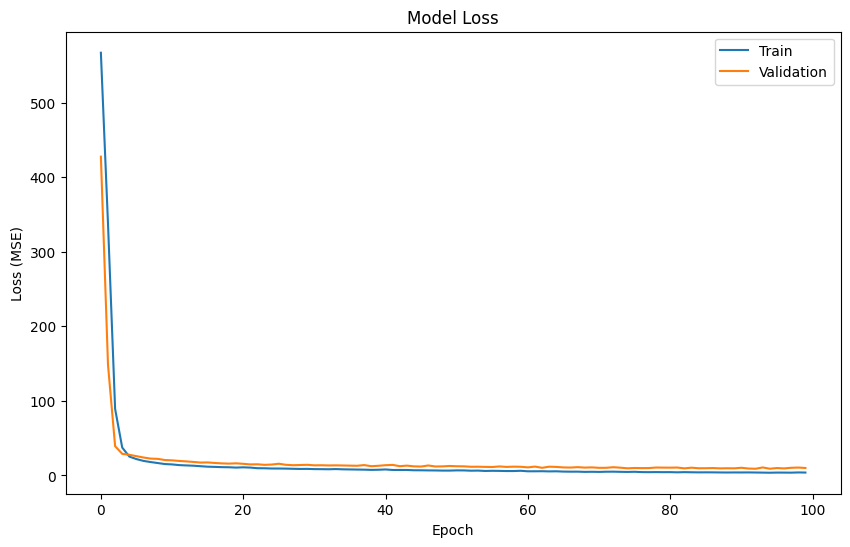

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [13]:
# 6. Evaluate the Model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Set Mean Squared Error: {loss:.2f}")

# 7. Make Predictions
y_pred = model.predict(X_test_scaled)

# Calculate R-squared for a more intuitive metric
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9812

Test Set Mean Squared Error: 12.00
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R-squared: 0.84
